# Task 1: Enhance image quality to deal with varying lighting conditions.

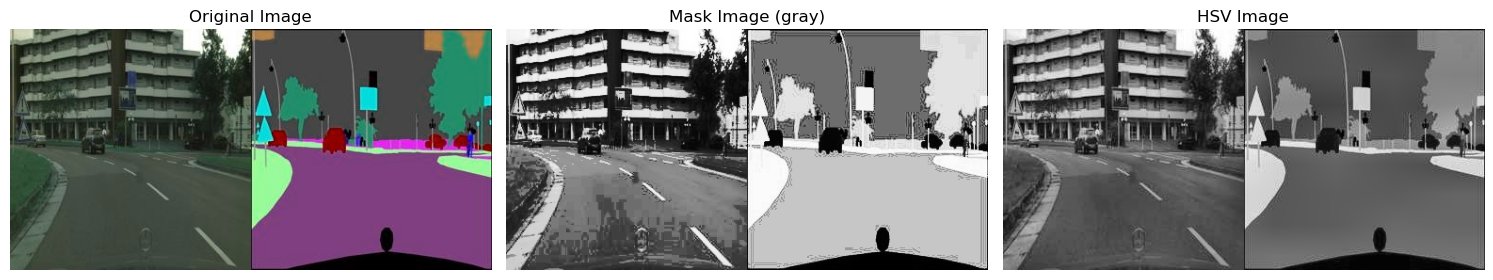

In [7]:
import cv2 as cv
from matplotlib import pyplot as plt

image_path = 'C:/REALM/Innovative Skill/Image Processing/Final exam/Road.jpg'
original_image = cv.imread(image_path)

gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
equalized_image = cv.equalizeHist(gray_image)
enhanced_image_color = cv.cvtColor(equalized_image, cv.COLOR_GRAY2BGR)

clahe = cv.createCLAHE(2,(8, 8))
clahe_image = clahe.apply(gray_image)
clahe_image_color = cv.cvtColor(clahe_image, cv.COLOR_GRAY2BGR)

plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(enhanced_image_color)
plt.title('Mask Image (gray)')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(clahe_image_color,cmap='gray')
plt.title('HSV Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Task 2: Detect edges of vehicles and road markings to assess traffic patterns.

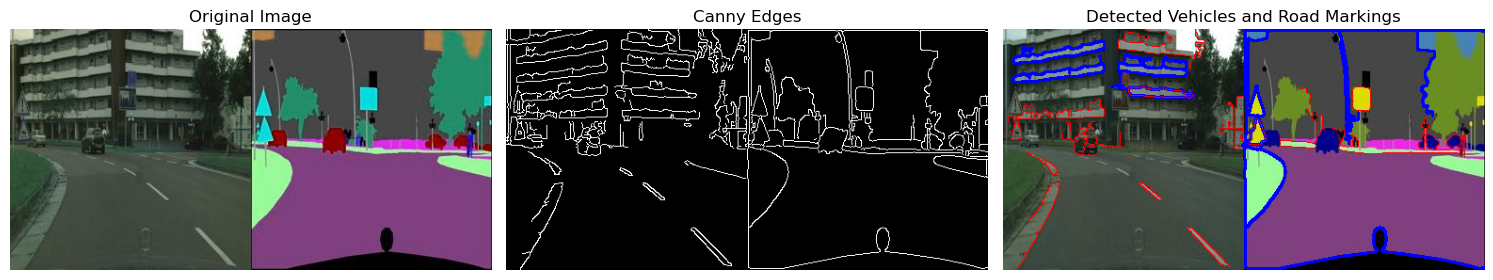

In [8]:
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)
edges = cv.Canny(blurred_image, 50, 150)

contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contour_image = original_image.copy()
cv.drawContours(contour_image, contours, -1, (0, 255, 0), 1)  


vehicle_contours = []
road_marking_contours = []
for cnt in contours:
    area = cv.contourArea(cnt)
    if 500 < area < 3000: 
        vehicle_contours.append(cnt)
    elif 50 < area < 500:
        road_marking_contours.append(cnt)

filtered_contour_image = original_image.copy()
cv.drawContours(filtered_contour_image, vehicle_contours, -1, (255, 0, 0), 2) 
cv.drawContours(filtered_contour_image, road_marking_contours, -1, (0, 0, 255), 1) 

plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(cv.cvtColor(filtered_contour_image, cv.COLOR_BGR2RGB))
plt.title('Detected Vehicles and Road Markings')
plt.axis('off')

plt.tight_layout()
plt.show()


# Task 3: Apply filters to reduce noise and improve the clarity of moving objects


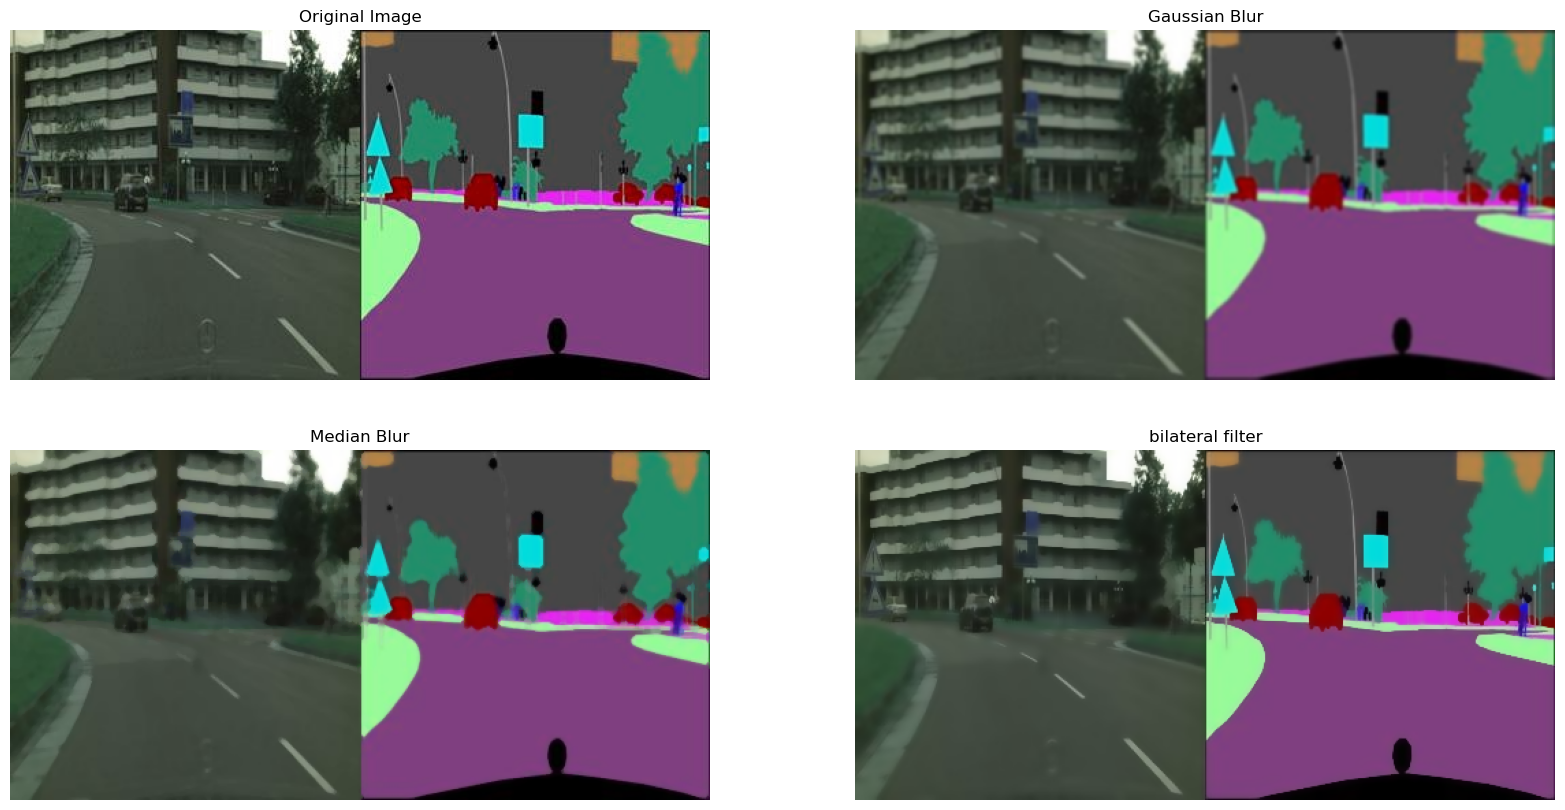

In [9]:
gaussian_blur = cv.GaussianBlur(original_image, (5, 5), 0)
median_blur = cv.medianBlur(original_image, 5)
bilateral_filter = cv.bilateralFilter(original_image, 9, 75, 75)

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(median_blur)
plt.title('Median Blur')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(bilateral_filter)
plt.title('bilateral filter')
plt.axis('off')

plt.show()
